In [2]:
import requests
import shapely.geometry as geom


In [3]:
url = "http://loc.geopunt.be/geolocation/suggestion?q=Trambergstraat 10"
url = "https://loc.geopunt.be/v4/suggestion?q=Trambergstraat 10"
url = "https://loc.geopunt.be/v4/suggestion?q=Sint-Antoniusplein 19, 2910 Essen"
url = "https://loc.geopunt.be/v4/suggestion?q=Hofstraat 37, 2910 Essen"
response = requests.get(url)

# Here the response format is a json file, it is used as a dictionary
print(response.json())

{'SuggestionResult': ['Hofstraat 37, 2910 Essen']}


In [4]:
# url = "http://loc.geopunt.be/geolocation/suggestion?q=Kouter 26"
# url = "http://loc.geopunt.be/geolocation/v4/suggestion?q=Kouter 26, 9000 Gent"
# # url = "http://loc.geopunt.be/geolocation/v4/suggestion?trambergstraat%201"
address = "Kouter 10, 9000 Gent"
address = "Sint-Antoniusplein 19, 2910 Essen"

url = f"https://loc.geopunt.be/v4/Location?q={address}"


response = requests.get(url)
response = response.json()


# Here the response format is a json file, it is used as a dictionary
print(response)


#GET v4/Suggestion?q={q}&c={c}
 

{'LocationResult': [{'Municipality': 'Essen', 'Zipcode': '2910', 'Thoroughfarename': 'Sint-Antoniusplein', 'Housenumber': '19', 'ID': 1530410, 'FormattedAddress': 'Sint-Antoniusplein 19, 2910 Essen', 'Location': {'Lat_WGS84': 51.46162820790422, 'Lon_WGS84': 4.454437781233087, 'X_Lambert72': 155954.89, 'Y_Lambert72': 239115.28}, 'LocationType': 'crab_huisnummer_afgeleidVanGebouw', 'BoundingBox': {'LowerLeft': {'Lat_WGS84': 51.46162820790422, 'Lon_WGS84': 4.454437781233087, 'X_Lambert72': 155954.89, 'Y_Lambert72': 239115.28}, 'UpperRight': {'Lat_WGS84': 51.46162820790422, 'Lon_WGS84': 4.454437781233087, 'X_Lambert72': 155954.89, 'Y_Lambert72': 239115.28}}}]}


In [8]:
address = "Kouter 10, 9000 Gent"
address = "Sint-Antoniusplein 19, 2910 Essen"
# address = "Limburgstraat 14, 9000 Gent"
address = "Hofstraat 37, 2910 Essen"
address = "Elzendreef 14, 2910 Essen"

req = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
info = {'address' : address, 
        'x_value' : req['LocationResult'][0]['Location']['X_Lambert72'],
        'y_value' : req['LocationResult'][0]['Location']['Y_Lambert72'],
        'street' : req['LocationResult'][0]['Thoroughfarename'],
        'house_number' : req['LocationResult'][0]['Housenumber'], 
        'postcode': req['LocationResult'][0]['Zipcode'], 
        'municipality' : req['LocationResult'][0]['Municipality']}
    
detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch",
                      params={"postcode": info['postcode'], 
                      "straatnaam": info['street'],
                      "huisnummer": info['house_number']}).json()
building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
build = requests.get(building['gebouw']['detail']).json()
info['polygon'] = [build['geometriePolygoon']['polygon']]


In [9]:
req

{'LocationResult': [{'Municipality': 'Essen',
   'Zipcode': '2910',
   'Thoroughfarename': 'Elzendreef',
   'Housenumber': '14',
   'ID': 1219931,
   'FormattedAddress': 'Elzendreef 14, 2910 Essen',
   'Location': {'Lat_WGS84': 51.45553140760153,
    'Lon_WGS84': 4.439196884648804,
    'X_Lambert72': 154896.23,
    'Y_Lambert72': 238435.79},
   'LocationType': 'crab_huisnummer_afgeleidVanGebouw',
   'BoundingBox': {'LowerLeft': {'Lat_WGS84': 51.45553140760153,
     'Lon_WGS84': 4.439196884648804,
     'X_Lambert72': 154896.23,
     'Y_Lambert72': 238435.79},
    'UpperRight': {'Lat_WGS84': 51.45553140760153,
     'Lon_WGS84': 4.439196884648804,
     'X_Lambert72': 154896.23,
     'Y_Lambert72': 238435.79}}}]}

In [10]:
info

{'address': 'Elzendreef 14, 2910 Essen',
 'x_value': 154896.23,
 'y_value': 238435.79,
 'street': 'Elzendreef',
 'house_number': '14',
 'postcode': '2910',
 'municipality': 'Essen',
 'polygon': [{'coordinates': [[[154903.46516664326, 238441.10026341677],
     [154900.6807826385, 238447.15248742327],
     [154894.67809463292, 238444.41315941885],
     [154896.5193746388, 238440.5250314176],
     [154891.68059063703, 238438.12477541715],
     [154890.47316662967, 238440.83760741726],
     [154883.6819986254, 238437.6483594142],
     [154888.88417463005, 238426.53219940886],
     [154899.87745463848, 238431.69239141047],
     [154901.75675064325, 238427.712615408],
     [154907.2643346414, 238430.41623140872],
     [154904.82683064044, 238435.2454154119],
     [154906.65595064312, 238436.14640741423],
     [154904.11771064252, 238441.41667941958],
     [154903.46516664326, 238441.10026341677]]],
   'type': 'Polygon'}]}

In [92]:
# Plot polygon
poly_building = info['polygon'][0]['coordinates'][0]
poly_building

[[156756.23355191946, 239387.70288807154],
 [156761.3869599253, 239376.37066406384],
 [156767.87143993378, 239379.28983206674],
 [156768.62420792878, 239377.63709606603],
 [156770.79508793354, 239376.7989520654],
 [156773.09806393832, 239377.96093606576],
 [156773.7593119368, 239379.8987280652],
 [156772.9146399349, 239381.6417040676],
 [156783.99508794397, 239386.78576807305],
 [156778.73275193572, 239398.19453607872],
 [156771.1684639305, 239394.66288807616],
 [156771.95361593366, 239393.34615207464],
 [156764.3418399319, 239389.92445607483],
 [156763.67150393128, 239391.2441360727],
 [156756.23355191946, 239387.70288807154]]

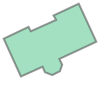

In [93]:
geom.Polygon(poly_building)